
#Climbing The Steps of The Empire State Building Steps: The Game
The objective is to create a Dice game logic, which will decide the odds of reaching Step number 60 of the Empire State Building in 100 rolls of the die. We would then simulate this sequence multiple times to calculate the probability of reaching step 60 in 100 tries using the Dice game logic.


#Rules
For each random walk sequence we throw a Die.
1. Step 0 at ground level, is the starting point.
2. If the roll of the Die returns 1 or 2, climb down one step.
3. If the roll of the Die returns 3, 4 or 5, go up one step.
4. If the roll of the Die returns 6, throw the Die again and advance the number of steps equal to that throw.
5. There is a little chance of being clumsy and falling down the Stairs in which case we start again from 0.
6. The value of Steps cannot be negative, the lowest value would always be 0 (which is the starting point).

#Some pointers that might help with the code:

1. The function random.seed() may be used to make your results reproducible.
2. To represent clumsiness of falling down, generate a random number between 0 and 1. If that number is less than .001, set the steps value to Zero as is the rule.
3. You'll want to run the Dice game many times to calculate the probability of reaching step 60 in 100 rolls.




# Your Tasks
1. Write code for the above Dice game.
2. Estimate the probability of reaching step 60 in 100 rolls.
3. Create a plot of your random walk results.

# Solution


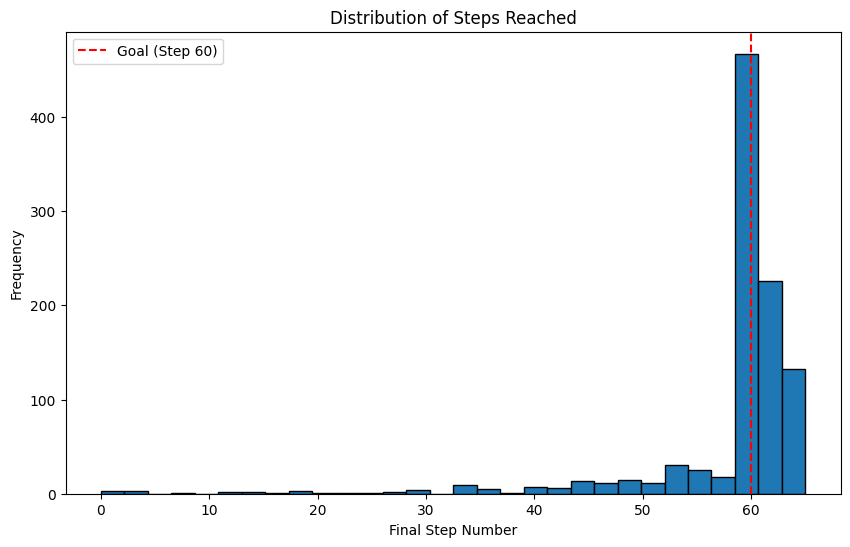


Probability of reaching step 60: 82.00%


In [1]:
import random
import matplotlib.pyplot as plt

def play_empire_state_game(num_simulations=1000):
    # Track successful attempts
    successes = 0

    # Store steps for plotting
    all_steps = []

    for _ in range(num_simulations):
        steps = 0
        # 100 dice rolls per game
        for _ in range(100):
            # Check for clumsiness
            if random.random() < 0.001:
                steps = 0
                continue

            # Roll the die
            roll = random.randint(1, 6)

            # Apply game rules
            if roll in [1, 2]:
                steps = max(0, steps - 1)  # Can't go below 0
            elif roll in [3, 4, 5]:
                steps += 1
            else:  # roll == 6
                bonus_roll = random.randint(1, 6)
                steps += bonus_roll

            # Check if reached or passed step 60
            if steps >= 60:
                successes += 1
                break

        all_steps.append(steps)

    # Calculate probability
    probability = successes / num_simulations

    # Create plot
    plt.figure(figsize=(10, 6))
    plt.hist(all_steps, bins=30, edgecolor='black')
    plt.title('Distribution of Steps Reached')
    plt.xlabel('Final Step Number')
    plt.ylabel('Frequency')
    plt.axvline(x=60, color='r', linestyle='--', label='Goal (Step 60)')
    plt.legend()
    plt.show()

    return probability

# Run simulation
prob = play_empire_state_game()

print(f"\nProbability of reaching step 60: {prob:.2%}")
